In [88]:
import pandas as pd
import numpy as np

import torch
from torch.autograd import Variable
import torch.nn as nn

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [8]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [9]:
def tokenize_corpus(corpus):
    t_corpus = [t.split() for t in corpus]
    return t_corpus

In [10]:
corpus_tokenized = tokenize_corpus(corpus)

corpus_tokenized

[['he', 'is', 'a', 'king'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['she', 'is', 'a', 'woman'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital']]

In [13]:
vocabulary = []

for sentence in corpus_tokenized:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)
            
print(f'The vocabulary: {vocabulary}')
print(f'The length of the vocabulary: {len(vocabulary)}')

vocabulary_size = len(vocabulary)

The vocabulary: ['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']
The length of the vocabulary: 15


In [14]:
word2idx = { w: idx for idx, w in enumerate(vocabulary)}
idx2word = { idx: w for idx, w in enumerate(vocabulary)}

In [16]:
idx2word

{0: 'he',
 1: 'is',
 2: 'a',
 3: 'king',
 4: 'she',
 5: 'queen',
 6: 'man',
 7: 'woman',
 8: 'warsaw',
 9: 'poland',
 10: 'capital',
 11: 'berlin',
 12: 'germany',
 13: 'paris',
 14: 'france'}

In [34]:
indices = [ word2idx[word] for word in sentence ]
indices

[13, 1, 14, 10]

In [40]:
window_size = 2
idx_pairs = []

for sentence in corpus_tokenized:
    indices = [ word2idx[word] for word in sentence ]
    #print(sentence)
    
    for center_word_pos in range(len(sentence)): ## each word is treated as a center word
        for w in range(-window_size, window_size+1):
            context_word_pos = center_word_pos + w
            #print(center_word_pos,'\t', context_word_pos ,'\t' )
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            
            #print('>>', center_word_pos,'\t', context_word_pos ,'\t' )
            idx_pairs.append((indices[center_word_pos],context_word_idx))
            
pairs = np.array(idx_pairs)

In [41]:
pairs

array([[ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  3],
       [ 2,  0],
       [ 2,  1],
       [ 2,  3],
       [ 3,  1],
       [ 3,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  5],
       [ 2,  4],
       [ 2,  1],
       [ 2,  5],
       [ 5,  1],
       [ 5,  2],
       [ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  6],
       [ 2,  0],
       [ 2,  1],
       [ 2,  6],
       [ 6,  1],
       [ 6,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  7],
       [ 2,  4],
       [ 2,  1],
       [ 2,  7],
       [ 7,  1],
       [ 7,  2],
       [ 8,  1],
       [ 8,  9],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 9,  8],
       [ 9,  1],
       [ 9, 10],
       [10,  1],
       [10,  9],
       [11,  1],
       [11, 12],
       [ 1, 11],
       [ 1, 12],
       [ 1, 10],
       [12, 11],
       [12,  1],
       [12, 10],
       [10,  1

In [48]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size)
    x[word_idx] = 1.0
    
    return x

In [133]:
embeddings_dim = 5
epochs = 100
learning_rate = 0.01

W1 = Variable(torch.randn(embeddings_dim, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embeddings_dim).float(), requires_grad=True)

_loss = []

for batch in range(epochs):
    loss = 0
    
    for data, target in pairs:
        X = Variable(get_input_layer(data)).float()
        y = Variable(torch.from_numpy(np.array([target]))).long()
        
        z1 = torch.matmul(W1, X)
        z2 = torch.matmul(W2, z1)
        
        y_predict = nn.functional.log_softmax(z2, dim=0)
        
        criterion = nn.functional.nll_loss(y_predict.view(1,-1), y)
        #print(criterion.data.item())
        loss += criterion.data.item()
        
        _loss.append(loss)
        
        criterion.backward()
        
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data
        
        W1.grad.data.zero_()
        W2.grad.data.zero_()
        
    if batch%10 == 0:
        print(f'Epoch : {batch} \t Loss: {loss/len(pairs)}')

Epoch : 0 	 Loss: 4.738785423551287
Epoch : 10 	 Loss: 2.786799708860261
Epoch : 20 	 Loss: 2.3816844723054342
Epoch : 30 	 Loss: 2.1715010023542813
Epoch : 40 	 Loss: 2.0440092535955565
Epoch : 50 	 Loss: 1.9654245427676609
Epoch : 60 	 Loss: 1.9132395697491509
Epoch : 70 	 Loss: 1.8739069815192904
Epoch : 80 	 Loss: 1.8410286622388021
Epoch : 90 	 Loss: 1.8120530788387572


In [134]:
W1, W2

(tensor([[-1.0317, -0.6890,  0.7674, -0.0170, -0.4390, -0.4257, -0.0280,  1.1484,
           0.3252, -1.0173,  1.4703, -0.4031,  0.3612,  0.4756, -0.7663],
         [ 0.9213,  0.1095, -0.2333,  1.0496,  1.2064,  0.5885,  0.7172,  1.8330,
          -1.5200,  0.4592, -0.1001,  1.0243,  0.3387, -0.0893, -0.2963],
         [ 1.1911,  0.0101,  1.7139,  1.5839,  1.0444,  0.8523,  0.6787,  1.1163,
           1.0447, -0.4204,  0.9695,  0.9814, -0.9822, -0.2900,  0.4428],
         [ 0.0229,  2.5179, -0.7290, -0.5221, -0.6163,  0.1817, -0.8781, -1.6088,
          -1.4987, -0.4028, -1.0636,  0.7528, -2.6663, -1.0476, -0.8176],
         [-0.9507, -1.3123,  1.1622, -0.4577, -0.6445, -1.2294, -0.5867, -0.3074,
          -0.6630, -0.6516, -0.3547,  0.1381, -0.5896, -1.4581,  0.2941]],
        requires_grad=True),
 tensor([[ 0.0794, -0.8909,  1.2540,  0.6725,  0.5507],
         [-1.0240,  0.2855,  2.6446, -1.2938, -1.0555],
         [-0.9926,  1.3157,  1.9005, -0.2765, -1.0412],
         [ 0.0757,  0.

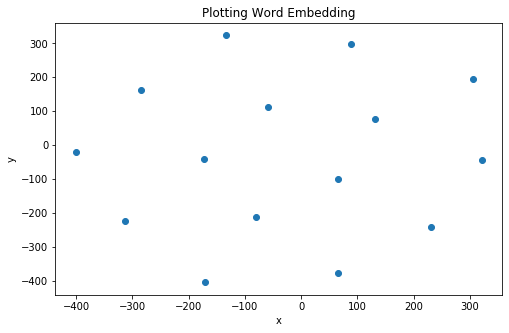

In [132]:
X = W2.detach().numpy()
#X_embedded = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23).fit_transform(X)
X_embedded = TSNE(n_components=2, init='pca', n_iter=1000).fit_transform(X)

labels = []
tokens = []
x = []
y = []

for value in X_embedded:
    x.append(value[0])
    y.append(value[1])


plt.figure(figsize=(8, 5))
plt.title('Plotting Word Embedding')
plt.xlabel('x')
plt.ylabel('y')
#for i in range(len(x)):
plt.scatter(x,y)
#plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
plt.show()

# Using Torch

In [147]:
class SGEmbeddingModel(nn.Module):
    
    def __init__(self, input_dim, embedding_size=5):
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim, embedding_size)
        
    def forward(self, x):
        x = nn.functional.log_softmax(self.fc1(x))
        return x

In [148]:
model = SGEmbeddingModel(vocabulary_size, embeddings_dim)
model

SGEmbeddingModel(
  (fc1): Linear(in_features=15, out_features=5, bias=True)
)

In [146]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100

train_loss = []

for epochs in range(epochs):
    
    
    